In [1]:
import pandas as pd
from pandas import DataFrame, Series

import sqlite3
import os

import matplotlib
from matplotlib import pyplot as plt

import requests
matplotlib.rcParams["font.size"] = 12

### Titanic dataset: https://www.kaggle.com/datasets/yasserh/titanic-dataset

A **copy** can be found at: `https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-lecture-material/-/raw/main/s24/AmFam_Ashwin/35_Plotting2/Lecture%20Code/titanic.csv`

## Warmup 1:  Requests and file writing

Download this file and save it locally in the file `titanic.csv`

In [2]:
# write your code here

# use requests to get this file
r = requests.get("https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-lecture-material/-/raw/main/s24/AmFam_Ashwin/35_Plotting2/Lecture%20Code/titanic.csv")

# check that the request was successful
r.raise_for_status()

# open a file called "titanic.csv" for writing the data locally to avoid spamming the server
f = open("titanic.csv", "w", encoding='utf-8')

# write the text of response to the file object
f.write(r.text)

# close the file object
f.close()

## Warmup 2:  Making a DataFrame

Read the `"titanic.csv"` file into a Pandas DataFrame

In [3]:
# write your code here
titanic_df = pd.read_csv("titanic.csv")

# display the head of the data frame
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Warmup 3: Some of our column names are not very clear, let's change them.
These should be our headers: `"ID", "Survived", "Passenger Class", "Name", "Sex", "Age", "No. of Siblings/Spouses aboard", "No. of Parents/Children aboard", "Ticket Number", "Fare", "Cabin", "Location Embarked"`

Refer to the documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [4]:
# write your code here
titanic_df = pd.read_csv("titanic.csv",
                 names=["ID", "Survived", "Passenger Class", "Name", "Sex", "Age", "No. of Siblings/Spouses aboard", 
                        "No. of Parents/Children aboard", "Ticket Number", "Fare", "Cabin", "Location Embarked"],
                 header=0)
titanic_df.head()

ID  Survived  Passenger Class  \
0   1         0                3   
1   2         1                1   
2   3         1                3   
3   4         1                1   
4   5         0                3   

                                                Name     Sex   Age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                             Heikkinen, Miss. Laina  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                           Allen, Mr. William Henry    male  35.0   

   No. of Siblings/Spouses aboard  No. of Parents/Children aboard  \
0                               1                               0   
1                               1                               0   
2                               0                               0   
3                               1                               0   
4                               0                               0   

      Ticket Number     Fare Cabin Location Embarked  
0         A/5 21171   7.2500   NaN                 S  
1          PC 17599  71.2833   C85                 C  
2  STON/O2. 3101282   7.9250   NaN                 S  
3            113803  53.1000  C123                 S  
4            373450   8.0500   NaN                 S

## Warmup 4: Connect to our database version of this data!

#### This following code will create a `titanic.db` file and write the contents of `titanic_df` into this Database

In [5]:
titanic_conn = sqlite3.connect("titanic.db")
titanic_df.to_sql("titanic", titanic_conn, if_exists="replace", index=False)

891

In [6]:
pd.read_sql("SELECT * FROM sqlite_master WHERE type='table'", titanic_conn)

type     name tbl_name  rootpage  \
0  table  titanic  titanic         2   

                                                 sql  
0  CREATE TABLE "titanic" (\n"ID" INTEGER,\n  "Su...

In [7]:
pd.read_sql("SELECT * FROM titanic LIMIT 5", titanic_conn)

ID  Survived  Passenger Class  \
0   1         0                3   
1   2         1                1   
2   3         1                3   
3   4         1                1   
4   5         0                3   

                                                Name     Sex   Age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                             Heikkinen, Miss. Laina  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                           Allen, Mr. William Henry    male  35.0   

   No. of Siblings/Spouses aboard  No. of Parents/Children aboard  \
0                               1                               0   
1                               1                               0   
2                               0                               0   
3                               1                               0   
4                               0                               0   

      Ticket Number     Fare Cabin Location Embarked  
0         A/5 21171   7.2500  None                 S  
1          PC 17599  71.2833   C85                 C  
2  STON/O2. 3101282   7.9250  None                 S  
3            113803  53.1000  C123                 S  
4            373450   8.0500  None                 S

## Warmup 5: Using SQL, get the 10 oldest male Titanic passengers

In [8]:
# write your code here
pd.read_sql("""
    SELECT *
    FROM titanic
    WHERE sex = 'male'
    ORDER BY age DESC
    LIMIT 10
""", titanic_conn)

ID  Survived  Passenger Class                                  Name   Sex  \
0  631         1                1  Barkworth, Mr. Algernon Henry Wilson  male   
1  852         0                3                   Svensson, Mr. Johan  male   
2   97         0                1             Goldschmidt, Mr. George B  male   
3  494         0                1               Artagaveytia, Mr. Ramon  male   
4  117         0                3                  Connors, Mr. Patrick  male   
5  673         0                2           Mitchell, Mr. Henry Michael  male   
6  746         0                1          Crosby, Capt. Edward Gifford  male   
7   34         0                2                 Wheadon, Mr. Edward H  male   
8   55         0                1        Ostby, Mr. Engelhart Cornelius  male   
9  281         0                3                      Duane, Mr. Frank  male   

    Age  No. of Siblings/Spouses aboard  No. of Parents/Children aboard  \
0  80.0                               0                               0   
1  74.0                               0                               0   
2  71.0                               0                               0   
3  71.0                               0                               0   
4  70.5                               0                               0   
5  70.0                               0                               0   
6  70.0                               1                               1   
7  66.0                               0                               0   
8  65.0                               0                               1   
9  65.0                               0                               0   

  Ticket Number     Fare Cabin Location Embarked  
0         27042  30.0000   A23                 S  
1        347060   7.7750  None                 S  
2      PC 17754  34.6542    A5                 C  
3      PC 17609  49.5042  None                 C  
4        370369   7.7500  None                 Q  
5    C.A. 24580  10.5000  None                 S  
6     WE/P 5735  71.0000   B22                 S  
7    C.A. 24579  10.5000  None                 S  
8        113509  61.9792   B30                 C  
9        336439   7.7500  None                 Q

## Warmup 6: Using SQL, get the average Fare for each Passenger Class.

In [9]:
# write your code here
pd.read_sql("""
    SELECT `Passenger Class`, AVG(Fare) AS `Average Fare`
    FROM titanic
    GROUP BY `Passenger CLass`
""", titanic_conn)

Passenger Class  Average Fare
0                1     84.154687
1                2     20.662183
2                3     13.675550

# Lecture 35:  Scatter Plots
**Learning Objectives**
- Set the marker, color, and size of scatter plot data
- Calculate correlation between DataFrame columns
- Use subplots to group scatterplot data

## Set the marker, color, and size of scatter plot data

To start, let's look at some made-up data about Trees.
The city of Madison maintains a database of all the trees they care for.

In [10]:
trees = [
    {"age": 1, "height": 1.5, "diameter": 0.8},
    {"age": 1, "height": 1.9, "diameter": 1.2},
    {"age": 1, "height": 1.8, "diameter": 1.4},
    {"age": 2, "height": 1.8, "diameter": 0.9},
    {"age": 2, "height": 2.5, "diameter": 1.5},
    {"age": 2, "height": 3, "diameter": 1.8},
    {"age": 2, "height": 2.9, "diameter": 1.7},
    {"age": 3, "height": 3.2, "diameter": 2.1},
    {"age": 3, "height": 3, "diameter": 2},
    {"age": 3, "height": 2.4, "diameter": 2.2},
    {"age": 2, "height": 3.1, "diameter": 2.9},
    {"age": 4, "height": 2.5, "diameter": 3.1},
    {"age": 4, "height": 3.9, "diameter": 3.1},
    {"age": 4, "height": 4.9, "diameter": 2.8},
    {"age": 4, "height": 5.2, "diameter": 3.5},
    {"age": 4, "height": 4.8, "diameter": 4},
]
trees_df = DataFrame(trees)
trees_df.head()

age  height  diameter
0    1     1.5       0.8
1    1     1.9       1.2
2    1     1.8       1.4
3    2     1.8       0.9
4    2     2.5       1.5

### Scatter Plots
We can make a scatter plot of a DataFrame using the following function...

`df_name.plot.scatter(x="x_col_name", y="y_col_name", color="peachpuff")`

## Example 1: Plot the trees data comparing a tree's age to its height
<pre>
 - What is `df_name`?
 - What is `x_col_name`?
 - What is `y_col_name`?
</pre>

<Axes: xlabel='age', ylabel='height'>

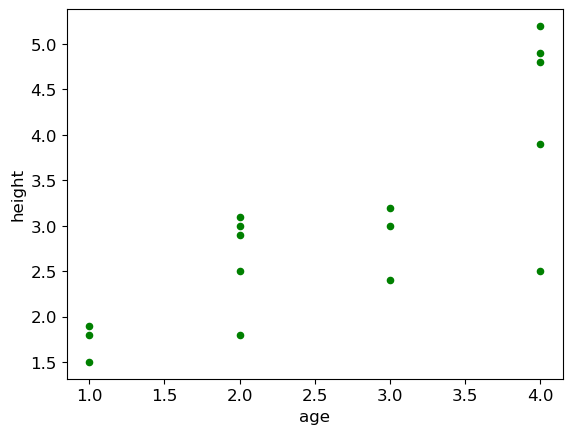

In [11]:
trees_df.plot.scatter(x="age", y="height", color="g")

#### Now plot with a little more beautification...
 - Use a new [color](https://matplotlib.org/3.5.0/_images/sphx_glr_named_colors_003.png)
 - Use a type of [marker](https://matplotlib.org/stable/api/markers_api.html)
 - Change the size (any int)

<Axes: xlabel='age', ylabel='height'>

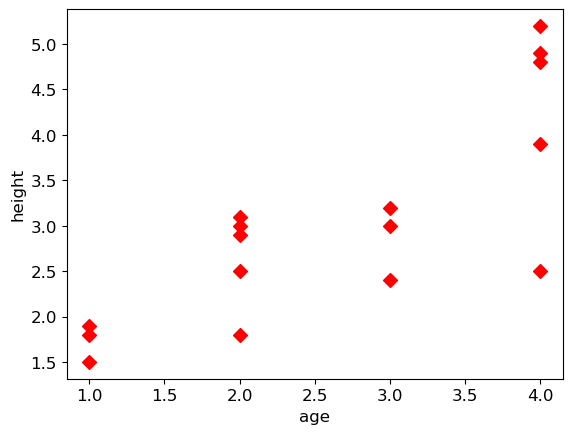

In [12]:
trees_df.plot.scatter(x="age", y="height", color="r", marker="D", s=50) # D for diamond

#### And we can add a Title to our plot...

Text(0.5, 1.0, 'Tree Age vs Height')

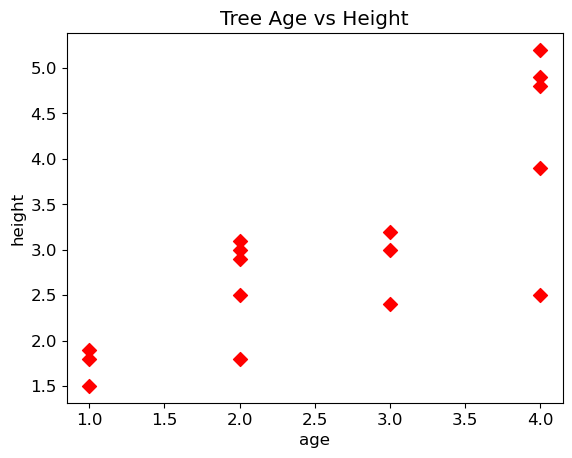

In [13]:
ax = trees_df.plot.scatter(x="age", y="height", color="r", marker="D", s=50)
ax.set_title("Tree Age vs Height")

# Correlation

## Example 2: What is the correlation between our DataFrame columns?

In [14]:
corr_df = trees_df.corr()
corr_df

age    height  diameter
age       1.000000  0.797468  0.854578
height    0.797468  1.000000  0.839345
diameter  0.854578  0.839345  1.000000

## Exercise 1:  What is the correlation between age and height?

In [15]:
# write your code here
corr_df['age']['height']

0.7974683544303798

### Variating Stylistic Parameters

<Axes: xlabel='age', ylabel='height'>

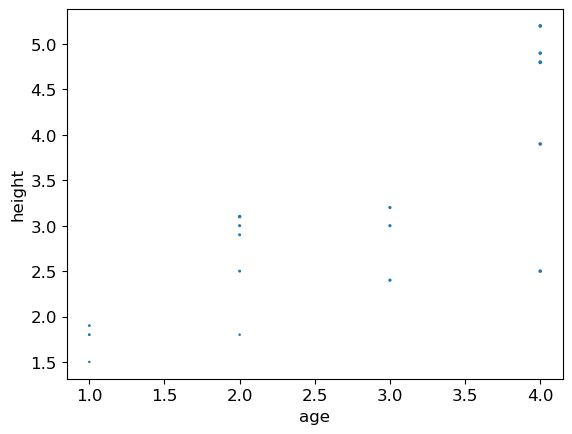

In [16]:
trees_df.plot.scatter(x="age", y="height", marker="H", s="diameter")

#### We should scale up the sizes to make them more easily visible

<Axes: xlabel='age', ylabel='height'>

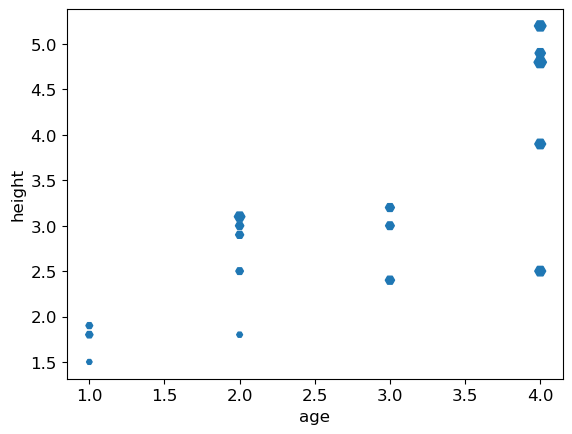

In [17]:
trees_df.plot.scatter(x="age", y="height", marker="H", s=trees_df["diameter"] * 20) # this way allows you to make it bigger

## Use subplots to group scatterplot data

### Re-visit the Titanic Data

In [18]:
titanic_df.head()

ID  Survived  Passenger Class  \
0   1         0                3   
1   2         1                1   
2   3         1                3   
3   4         1                1   
4   5         0                3   

                                                Name     Sex   Age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                             Heikkinen, Miss. Laina  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                           Allen, Mr. William Henry    male  35.0   

   No. of Siblings/Spouses aboard  No. of Parents/Children aboard  \
0                               1                               0   
1                               1                               0   
2                               0                               0   
3                               1                               0   
4                               0                               0   

      Ticket Number     Fare Cabin Location Embarked  
0         A/5 21171   7.2500   NaN                 S  
1          PC 17599  71.2833   C85                 C  
2  STON/O2. 3101282   7.9250   NaN                 S  
3            113803  53.1000  C123                 S  
4            373450   8.0500   NaN                 S

### How do we create a *scatter plot* for various *class types*?
First, gather all the class types.

#### In Pandas...

In [19]:
classes = list(set(titanic_df["Passenger Class"]))
classes

[1, 2, 3]

#### In SQL...

In [20]:
classes = sorted(list(pd.read_sql("""
    SELECT DISTINCT `Passenger Class`
    FROM titanic
""", titanic_conn)["Passenger Class"]))
classes

[1, 2, 3]

#### In reality, you can choose to write Pandas or SQL queries (or a mix of both!). For the rest of this lecture, we'll use Pandas.

In [21]:
# If you want to continue using SQL instead, don't close the connection!
titanic_conn.close()

## Exercise 2: Change this scatter plot so that the data is only for `Passenger class = 3`

<Axes: xlabel='Age', ylabel='Fare'>

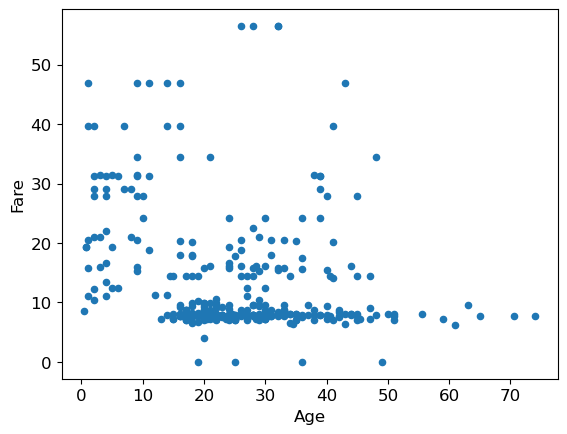

In [22]:
titanic_df[titanic_df["Passenger Class"] == 3].plot.scatter(x="Age", y="Fare")

## Exercise 3: Write a for loop that iterates through each Passenger Class and makes a plot for only that class

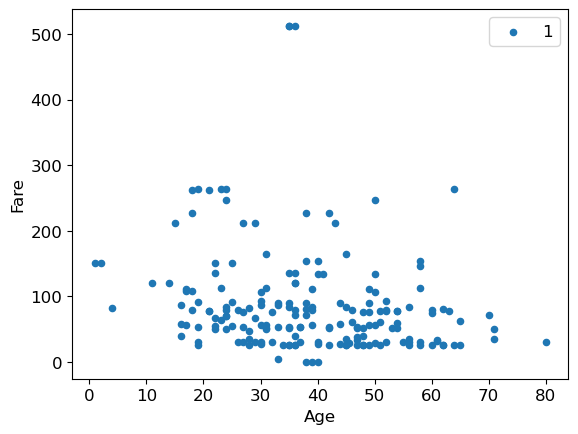

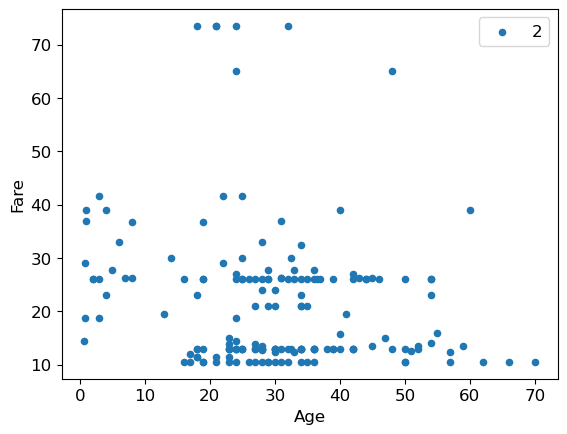

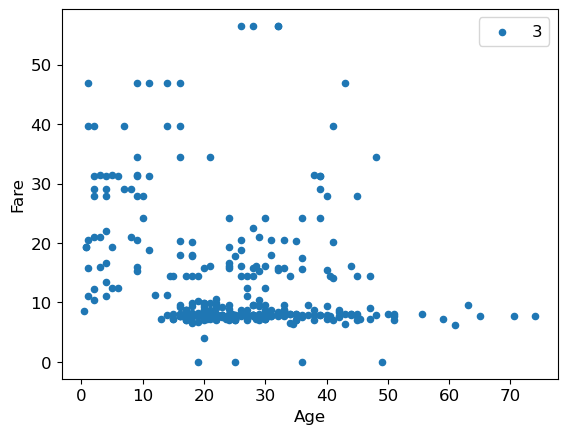

In [23]:
# write your code here
for i in range(len(classes)):
    pass_class = classes[i]
    
    # make a df just of just the data for this variety
    pass_class_df = titanic_df[titanic_df["Passenger Class"] == pass_class] 
    
    # make a scatter plot for this passenger class
    pass_class_df.plot.scatter(x="Age", y="Fare", label=pass_class)

#### Make the same series of plots, but this time make each plot a different color

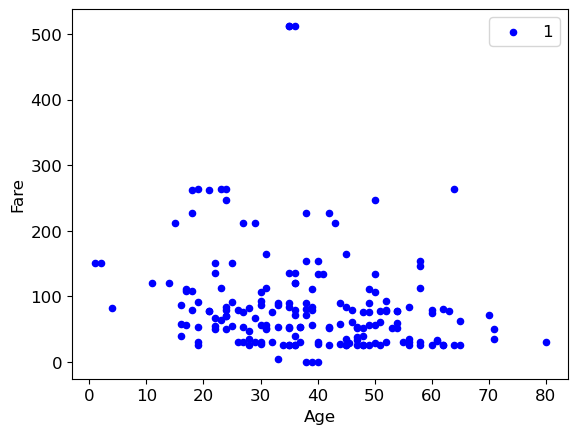

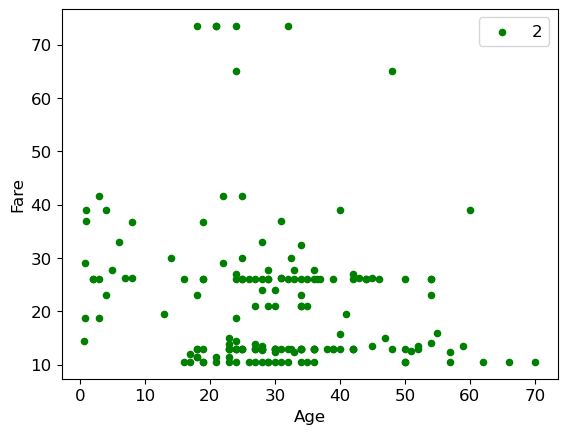

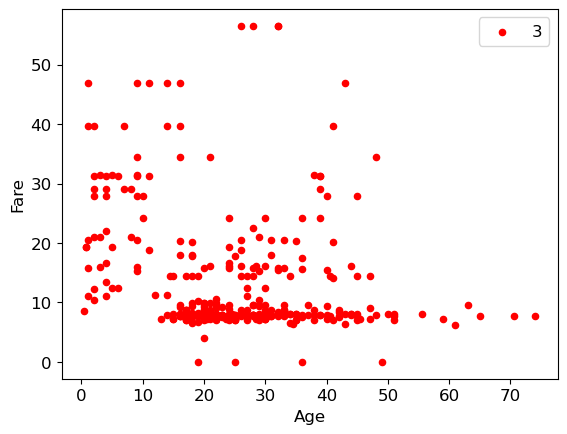

In [24]:
colors = ["blue", "green", "red"]

# write your code here
for i in range(len(classes)):
    pass_class = classes[i]
    
    # make a df just of just the data for this variety
    pass_class_df = titanic_df[titanic_df["Passenger Class"] == pass_class] 
    
    # make a scatter plot for this passenger class
    pass_class_df.plot.scatter(x="Age", y="Fare", label=pass_class, color=colors[i])

#### Make the same series of plots, but this time make each plot a different color AND marker

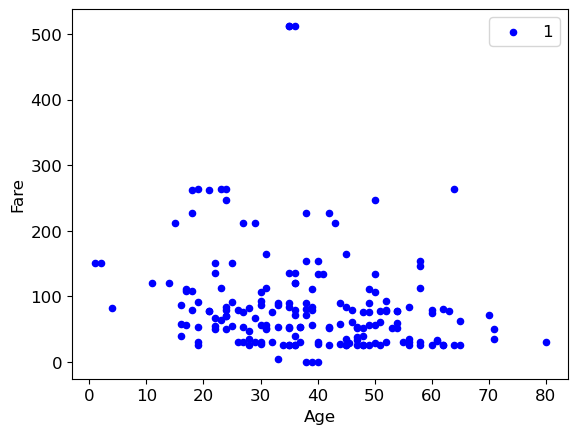

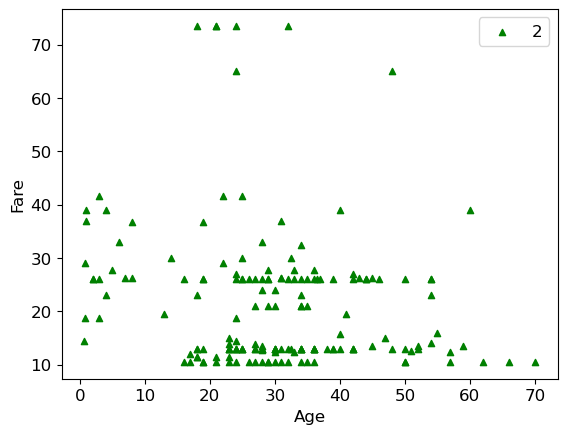

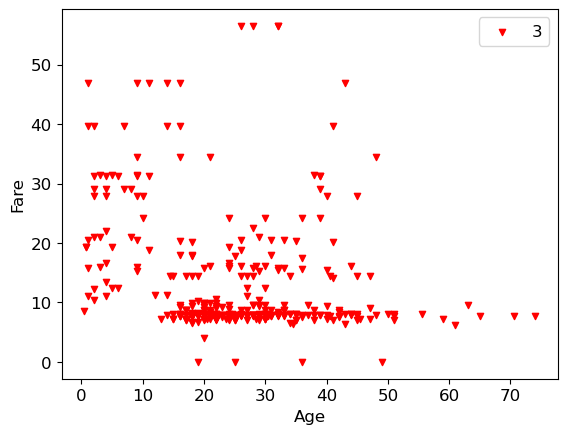

In [25]:
colors = ["blue", "green", "red"]
markers = ["o", "^", "v"]

# write your code here
for i in range(len(classes)):
    pass_class = classes[i]
    
    # make a df just of just the data for this variety
    pass_class_df = titanic_df[titanic_df["Passenger Class"] == pass_class] 
    
    # make a scatter plot for this passenger class
    pass_class_df.plot.scatter(x="Age", y="Fare", label=pass_class, color=colors[i], marker=markers[i])

**Food for thought:** Did you notice that it made 3 plots? What's deceptive about this?

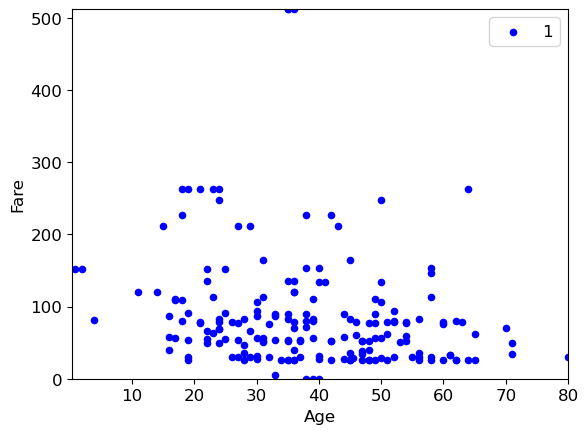

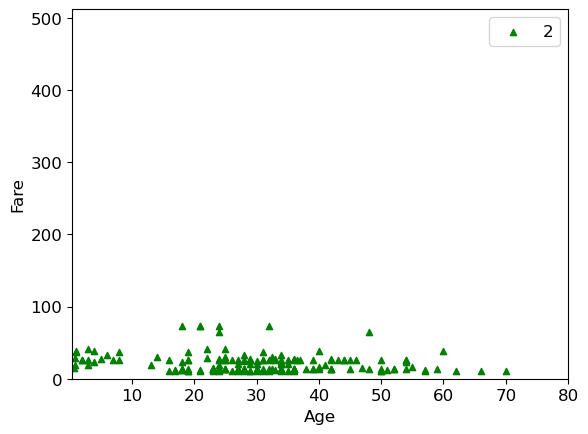

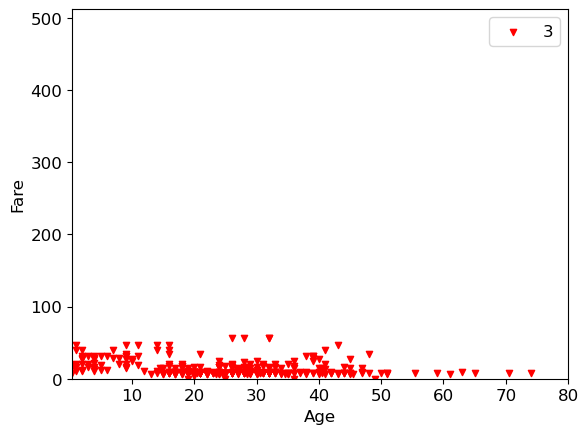

In [26]:
colors = ["blue", "green", "red"]
markers = ["o", "^", "v"]
min_x = titanic_df["Age"].min()
max_x = titanic_df["Age"].max()
min_y = titanic_df["Fare"].min()
max_y = titanic_df["Fare"].max()

for i in range(len(classes)):
    pass_class = classes[i]
    
    # make a df just of just the data for this variety
    pass_class_df = titanic_df[titanic_df["Passenger Class"] == pass_class] 
    
    # make a scatter plot for this passenger class
    pass_class_df.plot.scatter(x="Age", y="Fare", label=pass_class, color=colors[i], marker=markers[i], xlim=(min_x, max_x), ylim=(min_y, max_y))

#### We have to be VERY careful to not crop out data. We'll talk about this next lecture...

### We can also make Subplots in plots, called an AxesSubplot, keyword `ax`

<pre>
1. if AxesSuplot ax passed, then plot in that subplot
2. if ax is None, create a new AxesSubplot
3. return AxesSubplot that was used
</pre>

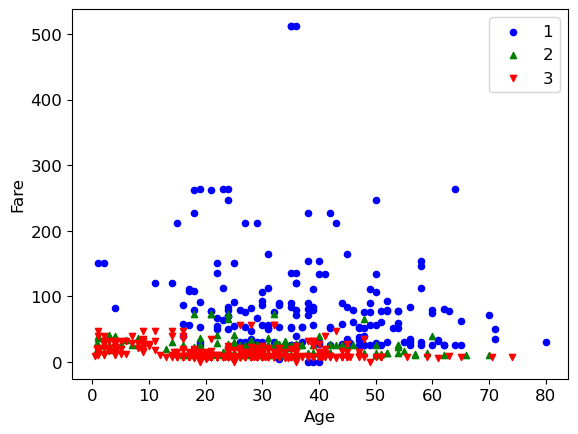

In [27]:
plot_area = None   # don't change this...look at this variable in the last line
colors = ["blue", "green", "red"]
markers = ["o", "^", "v"]
for i in range(len(classes)):
    pass_class = classes[i]
    
    # make a df just of just the data for this variety
    pass_class_df = titanic_df[titanic_df["Passenger Class"] == pass_class] 
    
    # make a scatter plot for this passenger class
    plot_area = pass_class_df.plot.scatter(x="Age", y="Fare", label=pass_class, color=colors[i], marker=markers[i], ax=plot_area)